In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_validate, cross_val_score

In [2]:
import sys  
sys.path.insert(0, 'C:\\Users\\albri\\Jupiter Workspace')
import albridge_lib as alb

In [3]:
pd.options.display.expand_frame_repr = False
pd.set_option('display.max_columns', None)

### Data download

In [4]:
X_train = pd.read_csv('train_ohe.csv', index_col='Id')
y_train = X_train['SalePrice']
X_train.drop('SalePrice', axis=1, inplace=True)
X_train.shape, y_train.shape

((1460, 230), (1460,))

In [5]:
X_test = pd.read_csv('test_ohe.csv', index_col='Id')
X_test.shape

(1459, 230)

### Keras

In [340]:
import keras
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [416]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim=X_train_ohe.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
#NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
#NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
opt = keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9)
#NN_model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mean_squared_error'])
NN_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
NN_model.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 128)               29568     
_________________________________________________________________
dense_106 (Dense)            (None, 256)               33024     
_________________________________________________________________
dense_107 (Dense)            (None, 1)                 257       
Total params: 62,849
Trainable params: 62,849
Non-trainable params: 0
_________________________________________________________________


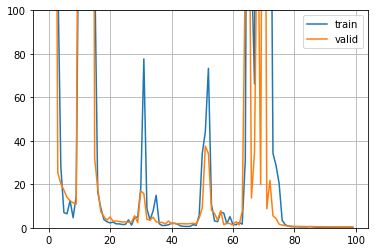

0.42852 96


In [417]:
'''checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
callbacks_list = [checkpoint]
history = NN_model.fit(X_train_ohe, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=callbacks_list)'''
history = NN_model.fit(X_train_ohe, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.ylim(0,100)
plt.legend()
plt.grid()
plt.show()
print(np.round(min(history.history['val_loss']),5), np.argmin(history.history['val_loss']))

#### keras-tuner
Hyperband

In [111]:
import kerastuner

def build_model(hp):
    model = Sequential()
    model.add(Dense(hp.Int('units1', min_value=32, max_value=256, step=32), 
                    kernel_initializer='normal', input_dim=X_train_ohe.shape[1], activation='relu'))
    model.add(Dense(hp.Int('units2', min_value=32, max_value=256, step=32), 
                    kernel_initializer='normal' ,activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
    return model

tuner = kerastuner.tuners.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=100,
    #max_trials=200,
    executions_per_trial=5,
    directory='tuner',
    overwrite=True)

In [112]:
%%time
tuner.search(X_train_ohe, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=0)

INFO:tensorflow:Oracle triggered exit
Wall time: 4min 33s


Проверяем лучшие модели  
fit продолжает обучать сверх 2 уже имеющихся итераций

In [115]:
tuner.results_summary()

In [116]:
models = tuner.get_best_models(num_models=5)

for model in models:
    model.summary()
    '''history = model.fit(X_train_ohe, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='valid')
    plt.legend()
    plt.grid()
    plt.show()
    print(np.round(min(history.history['val_loss']),5), np.argmin(history.history['val_loss']))
    print()'''

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 5,249
Trainable params: 5,249
Non-trainable params: 0
_________________________________________________________________
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
__________________________________

Check best model

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                7392      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 8,481
Trainable params: 8,481
Non-trainable params: 0
_________________________________________________________________


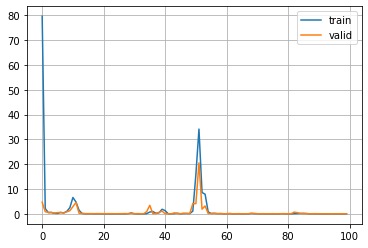

0.05586 99


In [57]:
NN_model = Sequential()
NN_model.add(Dense(32, kernel_initializer='normal',input_dim = X_train_ohe.shape[1], activation='relu'))
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))
NN_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
NN_model.summary()
history = NN_model.fit(X_train_ohe, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.grid()
plt.show()
print(np.round(min(history.history['val_loss']),5), np.argmin(history.history['val_loss']))

New train and forecast

In [117]:
NN_model = Sequential()
NN_model.add(Dense(32, kernel_initializer='normal',input_dim = X_train_ohe.shape[1], activation='relu'))
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))
NN_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
NN_model.summary()
history = NN_model.fit(X_train_ohe, y_train, epochs=100, batch_size=32, verbose=0)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 5,249
Trainable params: 5,249
Non-trainable params: 0
_________________________________________________________________


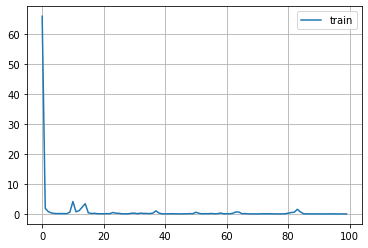

0.03784 76


In [120]:
plt.plot(history.history['loss'], label='train')
#plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.grid()
plt.show()
print(np.round(min(history.history['loss']),5), np.argmin(history.history['loss']))

In [127]:
y_pred = NN_model.predict(X_test_ohe)

In [138]:
y_pred[:,0]

array([11.879809, 11.636502, 12.238997, ..., 12.274324, 11.914496,
       12.421456], dtype=float32)

In [139]:
make_submission(y_pred[:,0])

### PyTorch

In [6]:
#device = "cuda:0"
device = 'cpu'

In [307]:
from sklearn.model_selection import train_test_split
X_tt, X_val, y_tt, y_val = train_test_split(X_train_ohe, y_train, test_size=0.2, random_state=42)

tX_train = torch.Tensor(X_tt.values)
ty_train = torch.Tensor(y_tt.values).view(-1,1)
tX_val = torch.Tensor(X_val.values)
ty_val = torch.Tensor(y_val.values).view(-1,1)

if device == "cuda:0":
    tX_train = tX_train.cuda()
    ty_train = ty_train.cuda()
    tX_val = tX_val.cuda()
    ty_val = ty_val.cuda()

In [308]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(X_train_ohe.shape[1], 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 1)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [418]:
net = Net()
net.to(device)
print(net)

Net(
  (fc1): Linear(in_features=230, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=1, bias=True)
)


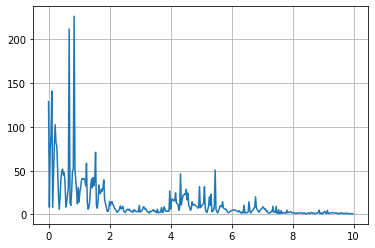

best score: 0.634
best iteration: 367
Wall time: 1.25 s


In [419]:
%%time

# Осуществляем оптимизацию путем стохастического градиентного спуска
optimizer = torch.optim.Adam(net.parameters(), eps=1e-7)
#optimizer = torch.optim.SGD(net.parameters(), lr=1e-8, momentum=0.9)

# Создаем функцию потерь
criterion = nn.MSELoss()

history = []

# создаем загрузчик
batch_size=32
datasets = torch.utils.data.TensorDataset(tX_train, ty_train)
train_iter = torch.utils.data.DataLoader(datasets, batch_size=batch_size, shuffle=True)


n_items = len(X_tt)
epochs = 10
#batch_size = 64
#batches_per_epoch = n_items // batch_size
#print(batches_per_epoch)
#n_batches = n_epochs * batches_per_epoch

# перебираем эпохи
for e in range(epochs):
    # пербираем случайные бэтчи внутри эпохи
    #for b in range(batches_per_epoch):
    for feature, target in train_iter:
        #batch = np.random.choice(n_items, batch_size, replace=False)
        #print(batch)
        #feature = torch.Tensor(X_tt.iloc[batch].values)
        #target = torch.Tensor(y_tt.iloc[batch].values).view(batch_size,1)
        optimizer.zero_grad()
        net_out = net(feature)
        loss = criterion(net_out, target)
        loss.backward()
        optimizer.step()
        history.append(np.sqrt(loss.item()))

hist_n = np.arange(len(history)) / len(history) * epochs
plt.plot(hist_n, history)
plt.grid()
plt.show()
print('best score:', np.round(min(history),3))
print('best iteration:', np.argmin(history))

In [406]:
def accuracy(model, data_x, data_y, pct_close):
    n_items = len(data_y)
    X = torch.Tensor(data_x)  # 2-d Tensor
    Y = torch.Tensor(data_y)  # actual as 1-d Tensor
    oupt = model(X)       # all predicted as 2-d Tensor
    pred = oupt.view(n_items)  # all predicted as 1-d
    #n_correct = torch.sum((torch.abs(pred - Y) < torch.abs(pct_close * Y)))
    #result = (n_correct.item() * 100.0 / n_items)  # scalar
    
    loss = nn.MSELoss()
    res = torch.sqrt(loss(pred, Y))
    #res = 
    return res.item()

In [420]:
net = net.eval()  # set eval mode
rmse = accuracy(net, X_val.values, y_val.values, 0.15)
#print("Accuracy on test data = %0.2f%%" % acc)
print(np.round(rmse,3))

1.032


train / test loop

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

#### PyTorch + Scorch

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import skorch
from skorch import NeuralNetClassifier
from skorch import NeuralNetRegressor

In [19]:
X_train_ps = X_train.values.astype('float32')
y_train_ps = y_train.values.astype('float32').reshape(-1, 1)

In [20]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128)
        #self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 1)
    
    def forward(self, x, **kwargs):
        x = F.relu(self.fc1(x))
        #x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x    

In [21]:
net = NeuralNetRegressor(
    Net,
    max_epochs=20,
    lr=1e-7,
)
net.fit(X_train_ps, y_train_ps)

  epoch     train_loss    valid_loss     dur
-------  -------------  ------------  ------
      1  13345401.5602      454.4230  0.0460
      2      398.3785      282.7027  0.0440
      3      276.6074      223.7910  0.0440
      4      227.8959      195.7768  0.0420
      5      203.0291      180.3514  0.0420
      6      188.0877      170.8094  0.0420
      7      178.3311      164.0785  0.0450
      8      171.5418      159.2878  0.0430
      9      166.6423      155.8475  0.0420
     10      162.9695      153.2648  0.0430
     11      160.1807      151.3283  0.0420
     12      158.0048      149.8033  0.0430
     13      156.1576      148.5643  0.0420
     14      154.5837      147.5376  0.0410
     15      153.2286      146.6759  0.0420
     16      152.0660      145.9382  0.0410
     17      151.0288      145.2802  0.0450
     18      150.0730      144.6618  0.0430
     19      149.1580      144.0584  0.0430
     20      148.2568      143.4397  0.0430


<class 'skorch.regressor.NeuralNetRegressor'>[initialized](
  module_=Net(
    (fc1): Linear(in_features=230, out_features=128, bias=True)
    (fc3): Linear(in_features=128, out_features=1, bias=True)
  ),
)

In [41]:
class Net(nn.Module):
    
    def __init__(self, num_units=128, nonlin=F.relu, dropout=0.5):
        super(Net, self).__init__()
        self.num_units = num_units
        self.nonlin = nonlin
        self.dropout = dropout
        
        self.fc1 = nn.Linear(X_train.shape[1], num_units)
        #self.dropout = nn.Dropout(dropout)
        #self.fc2 = nn.Linear(128, 128)
        #self.dropout = nn.Dropout(dropout)
        self.fc3 = nn.Linear(num_units, 1)
    
    def forward(self, x, **kwargs):
        x = F.relu(self.fc1(x))
        #x = self.dropout(x)
        #x = F.relu(self.fc2(x))
        #x = self.dropout(x)
        x = self.fc3(x)
        return x    

In [52]:
net = NeuralNetRegressor(
    Net,
    max_epochs=100,
    lr=1e-7,
    verbose=0,
    train_split=False
)
net.fit(X_train_ps, y_train_ps)

<class 'skorch.regressor.NeuralNetRegressor'>[initialized](
  module_=Net(
    (fc1): Linear(in_features=230, out_features=128, bias=True)
    (fc3): Linear(in_features=128, out_features=1, bias=True)
  ),
)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:   17.3s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   21.1s finished


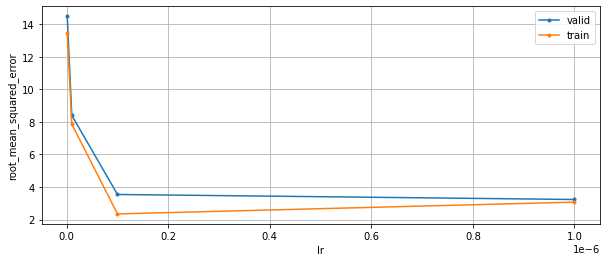

Best valid score: 3.231 (4.489)
Train score:      3.069 (4.545)
Best params: {'lr': 1e-06}


,cv score,cv std,time,train score,train std
{'lr': 1e-06},3.231,4.489,3.839,3.069,4.545
{'lr': 1e-07},3.540,2.072,3.688,2.345,0.453
{'lr': 1e-08},8.398,1.017,3.719,7.862,0.931
{'lr': 1e-09},14.489,6.921,3.711,13.443,3.176


In [53]:
params = {'lr': [1e-6, 1e-7, 1e-8, 1e-9]}
alb.sklearn_gridCV(net, X_train_ps, y_train_ps, 'neg_root_mean_squared_error', params, fit_train=True)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:   27.6s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   32.9s finished


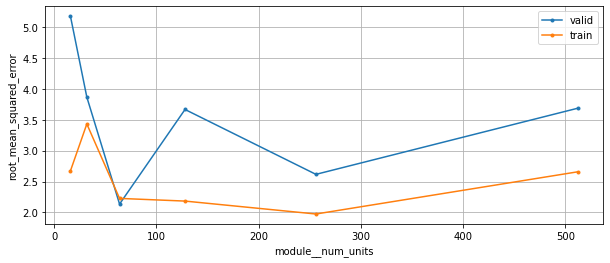

Best valid score: 2.136 (0.218)
Train score:      2.228 (0.254)
Best params: {'module__num_units': 64}


,cv score,cv std,time,train score,train std
{'module__num_units': 16},5.173,4.385,3.166,2.675,0.677
{'module__num_units': 32},3.866,1.703,3.196,3.432,1.883
{'module__num_units': 64},2.136,0.218,3.368,2.228,0.254
{'module__num_units': 128},3.666,2.954,3.784,2.185,0.210
{'module__num_units': 256},2.617,1.540,4.442,1.975,0.387
{'module__num_units': 512},3.687,2.309,5.665,2.658,0.662


In [54]:
params = {'module__num_units': [16, 32, 64, 128, 256, 512]}
alb.sklearn_gridCV(net, X_train_ps, y_train_ps, 'neg_root_mean_squared_error', params, fit_train=True)